In [1]:
from annotator.hed import HEDdetector
from annotator.uniformer import UniformerDetector
from annotator.util import HWC3, resize_image
from PIL import Image
import dataloaders
from argparse import Namespace
import tqdm
import numpy as np
import matplotlib.pyplot as plt


2024-01-22 21:53:51.683649: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-22 21:53:51.683683: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-22 21:53:51.684718: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-22 21:53:51.690623: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-22 21:53:52.461374: W tensorflow/comp

0it [00:00, ?it/s]

Use Checkpoint: False
Checkpoint Number: [0, 0, 0, 0]
Use global window for all blocks in stage3
load checkpoint from local path: /home/eric/noah/Text-Sketch/annotator/ckpts/upernet_global_small.pth


/home/eric/noah/Text-Sketch/annotator/uniformer/mmseg/models/segmentors/base.py:271: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '
1it [00:00,  1.10it/s]

Use Checkpoint: False
Checkpoint Number: [0, 0, 0, 0]
Use global window for all blocks in stage3
load checkpoint from local path: /home/eric/noah/Text-Sketch/annotator/ckpts/upernet_global_small.pth


2it [00:01,  1.07it/s]

Use Checkpoint: False
Checkpoint Number: [0, 0, 0, 0]
Use global window for all blocks in stage3
load checkpoint from local path: /home/eric/noah/Text-Sketch/annotator/ckpts/upernet_global_small.pth


3it [00:02,  1.06it/s]

Use Checkpoint: False
Checkpoint Number: [0, 0, 0, 0]
Use global window for all blocks in stage3
load checkpoint from local path: /home/eric/noah/Text-Sketch/annotator/ckpts/upernet_global_small.pth


4it [00:03,  1.06it/s]

Use Checkpoint: False
Checkpoint Number: [0, 0, 0, 0]
Use global window for all blocks in stage3
load checkpoint from local path: /home/eric/noah/Text-Sketch/annotator/ckpts/upernet_global_small.pth


4it [00:04,  1.17s/it]


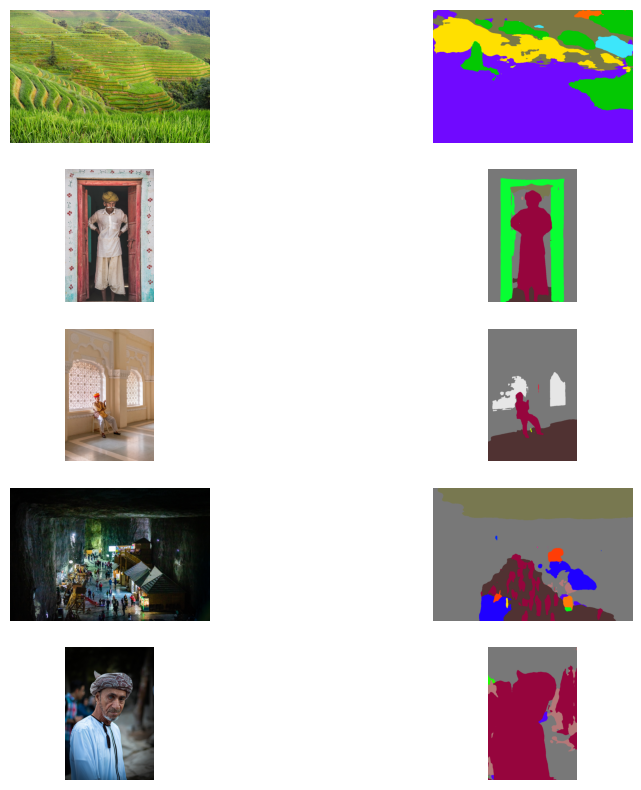

In [9]:
args = Namespace()
args.dataset = 'CLIC2021'
args.data_root = '/home/eric/data'
dm = dataloaders.get_dataloader(args)

j = 0
fig, axs = plt.subplots(nrows=5, ncols=2, squeeze=False, figsize=(10, 10))

for i, x in tqdm.tqdm(enumerate(dm.test_dset)):

    x = x[0]
    x_im = (255*x.permute(1,2,0)).numpy().astype(np.uint8)
    im = resize_image(HWC3(x_im), 512)
    axs[j, 0].imshow(im)
    axs[j, 0].axis('off')
    apply_hed = UniformerDetector()
    hed_map = HWC3(apply_hed(im))
    # sketch = Image.fromarray(hed_map)
    # sketch = (sketch).unsqueeze(0)
    axs[j, 1].imshow(hed_map)
    axs[j, 1].axis('off')
    
    if j == 4:
        break
    j += 1
